In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from kaggle.api.kaggle_api_extended import KaggleApi

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [4]:
api = KaggleApi()
api.authenticate()

data_name = "sahilislam007/college-student-placement-factors-dataset"
api.dataset_download_files(data_name, path='./dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset


In [5]:
student_placement = pd.read_csv('./dataset/college_student_placement_dataset.csv')

In [6]:
student_placement

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [7]:
student_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [8]:
student_placement.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [9]:
student_placement.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [10]:
student_placement.isna().sum() / len(student_placement)*100 # hitung presentase missing value pada masing-masing column

College_ID                0.0
IQ                        0.0
Prev_Sem_Result           0.0
CGPA                      0.0
Academic_Performance      0.0
Internship_Experience     0.0
Extra_Curricular_Score    0.0
Communication_Skills      0.0
Projects_Completed        0.0
Placement                 0.0
dtype: float64

In [11]:
student_placement.duplicated().sum()

np.int64(0)

In [12]:
student_placement.groupby('Placement')['Internship_Experience'].value_counts().unstack()

Internship_Experience,No,Yes
Placement,,
No,5024,3317
Yes,1012,647


#### **change data categoric to numuric**

In [13]:
student_placement['Internship_Experience'] = student_placement['Internship_Experience'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
student_placement['Placement'] = student_placement['Placement'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
student_placement


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,0,1,8,0,1
9996,CLG0098,70,9.25,9.34,7,0,0,7,2,0
9997,CLG0066,89,6.08,6.25,3,1,3,9,5,0
9998,CLG0045,107,8.77,8.92,3,0,7,5,1,0


In [16]:
student_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [17]:
student_placement.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [18]:
student_placement.duplicated().sum()

np.int64(0)

In [19]:
# hilangkan outlier dengan iqr
def remove_outlier_iqr(df, columns, x):
    data_clean = df.copy()
    for col in columns:
        q1 = data_clean[col].quantile(0.25) # quartile pertama
        q3 = data_clean[col].quantile(0.75) # quartile ketiga
        iqr = q3 - q1
        lower_bound = q1 - x * iqr
        upper_bound = q3 + x * iqr
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean

In [20]:
numeric_cols = student_placement.select_dtypes(exclude='object').columns.tolist()
numeric_cols.remove('Placement')

In [21]:
student_placement_no_outliers = remove_outlier_iqr(student_placement, numeric_cols, 1.5)

In [22]:
student_placement_no_outliers.shape

(9939, 10)

In [23]:
student_placement.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


In [24]:
student_placement_no_outliers.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000
mean,99.492907,7.534261,7.531134,5.549351,0.396318,4.969715,5.556092,2.513834,0.165308
std,14.654855,1.446964,1.469237,2.874243,0.489156,3.159347,2.902374,1.715439,0.371477
min,58.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.500000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.550000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,109.500000,8.780000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,141.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


Text(0.5, 1.0, 'distribusi IQ mahasiswa')

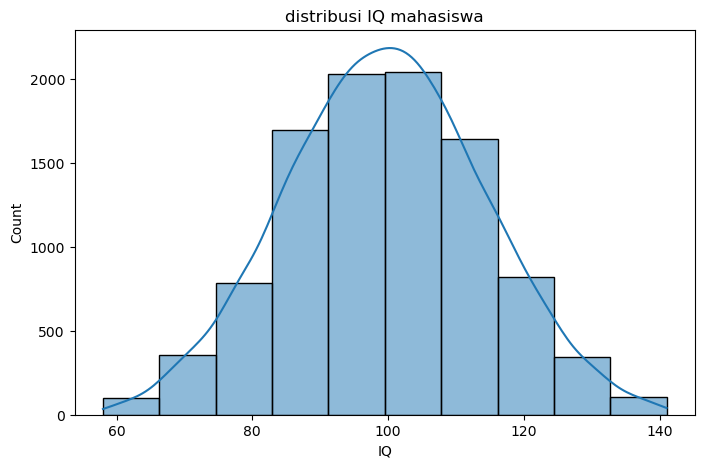

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(student_placement_no_outliers['IQ'], kde=True, bins=10)
plt.title('distribusi IQ mahasiswa')

In [26]:
select_cols = student_placement_no_outliers.select_dtypes(exclude='object').columns.tolist()
student_placement_no_outliers[select_cols].corr().style.background_gradient(cmap='Blues', vmin=0, vmax=1).format(precision=2)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
IQ,1.00,-0.00,-0.00,-0.01,0.00,-0.01,-0.01,0.02,0.29
Prev_Sem_Result,-0.00,1.00,0.98,-0.01,-0.01,0.01,-0.02,0.02,0.32
CGPA,-0.00,0.98,1.00,-0.00,-0.01,0.01,-0.02,0.02,0.32
Academic_Performance,-0.01,-0.01,-0.00,1.00,0.03,0.01,-0.02,-0.01,-0.01
Internship_Experience,0.00,-0.01,-0.01,0.03,1.00,0.00,-0.02,-0.01,-0.01
Extra_Curricular_Score,-0.01,0.01,0.01,0.01,0.00,1.00,0.00,0.01,-0.01
Communication_Skills,-0.01,-0.02,-0.02,-0.02,-0.02,0.00,1.00,-0.00,0.32
Projects_Completed,0.02,0.02,0.02,-0.01,-0.01,0.01,-0.00,1.00,0.22
Placement,0.29,0.32,0.32,-0.01,-0.01,-0.01,0.32,0.22,1.00


In [27]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [28]:
X = student_placement_no_outliers.drop(['College_ID', 'Placement'], axis=1).values
y = student_placement_no_outliers['Placement'].values

In [29]:
print(f'Distribusi kelas sebelum SMOTE : {Counter(y)}')

Distribusi kelas sebelum SMOTE : Counter({np.int64(0): 8296, np.int64(1): 1643})


In [30]:
smote = SMOTE(random_state=42)

In [31]:
x_smote , y_smote = smote.fit_resample(X, y)
print(f'Distribusi Kelas setelah SMOTE : {Counter(y_smote)}')

Distribusi Kelas setelah SMOTE : Counter({np.int64(0): 8296, np.int64(1): 8296})


In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)

# **Hyperparameter Tunning (GridSearchCV)**

In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

In [34]:
param_grid = [
    {   # KNN
        'model' : [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {   # SVM
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {   # Random Forest
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20]
    },
    {   # Logistic Regression
        'model': [LogisticRegression(max_iter=10000, solver='liblinear')],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2']
    }
]

In [35]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

In [36]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
cv_score = cross_val_score(grid_search, xtrain, ytrain, cv=kf, scoring='accuracy')
print(f'performance pada masing-masing bagian : {cv_score}')

performance pada masing-masing bagian : [0.99887006 0.99849341 0.99811676 1.         0.99962321]


In [38]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [3, 5, 7, 9],
                          'model__p': [1, 2],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__max_depth': [None, 10, 20],
                          'model__n_estimators': [50, 100]},
                         {'model': [LogisticRegression(max_iter=10000,
                                                       solver='liblinear')],
                          'model__C': [0.01, 0.1, 1, 10],
                          'model__penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [39]:
ypredict_model = grid_search.predict(xtest)

In [40]:
accuracy_model = accuracy_score(ytest, ypredict_model)
accuracy_model

0.9990961132871347

In [41]:
print(classification_report(ytest, ypredict_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1660
           1       1.00      1.00      1.00      1659

    accuracy                           1.00      3319
   macro avg       1.00      1.00      1.00      3319
weighted avg       1.00      1.00      1.00      3319



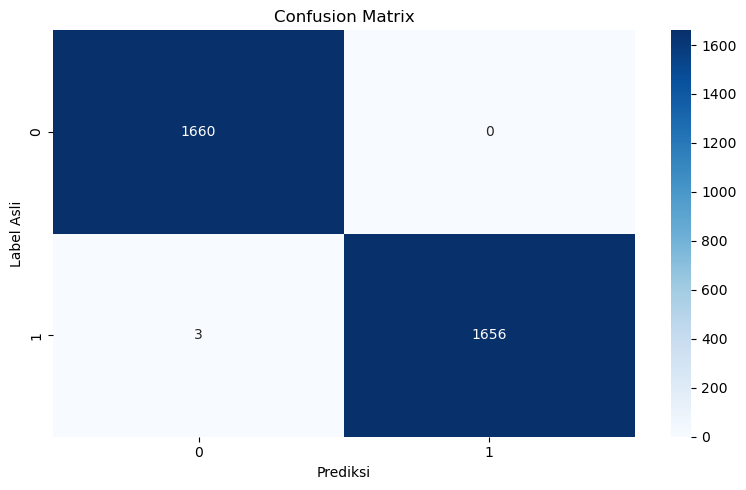

In [42]:
cm = confusion_matrix(ytest, ypredict_model)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=student_placement['Placement'].unique(),
            yticklabels=student_placement['Placement'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel('Label Asli')
plt.tight_layout()
plt.show()